### `HUGGINGFACE API`
- https://huggingface.co/docs/api-inference/en/quicktour
- Sign Up HuggingFace Account to Retrive the Access Tokens. (Settings -->Access Tokens)

In [52]:
# Importing our saved APIs from Google Colab's Secret Section where we saved all out APIs.
from google.colab import userdata
huggingface_api = userdata.get('HUGGINGFACE_KEY')

In [21]:
import requests
import json
API_URL = 'https://api-inference.huggingface.co/models/google/gemma-7b'
#API_URL = 'https://api-inference.huggingface.co/models/HuggignFaceH4/zephyr-7b-beta'
headers = {'Authorization': f"Bearer {huggingface_api}"}

In [22]:
# Querying to our model.
def query(payload):
    response = requests.post(API_URL, headers = headers, json = payload)
    return response.json()

In [23]:
question = {
  "inputs" :'Can you please mention the capital city of India?'
}
output = query(question)
print(output)

[{'generated_text': 'Can you please mention the capital city of India?\n\nAnswer:\nThe capital city of India is New Delhi.'}]


In [24]:
print(output[0])

{'generated_text': 'Can you please mention the capital city of India?\n\nAnswer:\nThe capital city of India is New Delhi.'}


In [25]:
print(output[0]['generated_text'])

Can you please mention the capital city of India?

Answer:
The capital city of India is New Delhi.


### `OPENAI API`
- https://platform.openai.com/api-keys
- Signup on OpenAI Account to Retrive the Access Tokens. (Login-->API-->API keys--> Create New Secret).

In [65]:
# Importing our saved APIs from Google Colab's Secret Section where we saved all out APIs.
from google.colab import userdata
openai_api = userdata.get('OPENAI_API_KEY')

In [27]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00


In [66]:
from openai import OpenAI
import pandas as pd

In [67]:
client = OpenAI(api_key = openai_api)
client

In [68]:
models = client.models.list().data
models[0]

Model(id='dall-e-3', created=1698785189, object='model', owned_by='system')

In [69]:
all_models = pd.DataFrame(models, columns = ['id', 'created', 'object', 'owned_by'])
all_models

,id,created,object,owned_by
0,"(id, dall-e-3)","(created, 1698785189)","(object, model)","(owned_by, system)"
1,"(id, whisper-1)","(created, 1677532384)","(object, model)","(owned_by, openai-internal)"
2,"(id, davinci-002)","(created, 1692634301)","(object, model)","(owned_by, system)"
3,"(id, babbage-002)","(created, 1692634615)","(object, model)","(owned_by, system)"
4,"(id, dall-e-2)","(created, 1698798177)","(object, model)","(owned_by, system)"
5,"(id, gpt-3.5-turbo-16k)","(created, 1683758102)","(object, model)","(owned_by, openai-internal)"
6,"(id, tts-1-hd-1106)","(created, 1699053533)","(object, model)","(owned_by, system)"
7,"(id, tts-1-hd)","(created, 1699046015)","(object, model)","(owned_by, system)"
8,"(id, gpt-3.5-turbo-1106)","(created, 1698959748)","(object, model)","(owned_by, system)"
9,"(id, gpt-3.5-turbo-instruct-0914)","(created, 1694122472)","(object, model)","(owned_by, system)"


In [70]:
response = client.chat.completions.create(
    model = 'gpt-3.5-turbo-16k',
    messages = [
        {'role': 'system', 'content': 'you are a funny assistant who describes everything in funniest way'},
        {'role': 'user', 'content' :' compose a poem for the indian people'}
    ]
)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [ ]:
print(response.choices[0].message.content)

In [ ]:
# Image Generation
response = client.chat.completions.create(
    model = 'dall-e-3',
    prompt = 'a white siamese cat',
    size = '1024x1024',
    quality = 'standard',
    n = 1,
)

In [ ]:
response = client.chat.completions.create(
    model = 'dall-e-3',
    prompt = 'can you generate one creative and allegent thumbnail for my youtube video which no has seenso for topic name of the youtube video is mlops',
    size = '1024x1024',
    quality = 'standard',
    n = 1,
)

In [ ]:
image_url = response.data[0].url
image_url

### `GEMINI API`
- https://aistudio.google.com/app/apikey

In [34]:
# Importing our saved APIs from Google Colab's Secret Section where we saved all out APIs.
from google.colab import userdata
gemini_api = userdata.get('GOOGLE_API_KEY')

In [37]:
import google.generativeai as genai
genai.configure(api_key = gemini_api)

In [38]:
for model in genai.list_models():
    print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [47]:
for model in genai.list_models():
    if 'generateContent' in model.supported_generation_methods:
        print(model.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [41]:
model_text = genai.GenerativeModel('gemini-1.0-pro-001')
response = model_text.generate_content('What is the capital of India and give me a sweet pe on capital of India')
print(response.text)

**Capital of India:** New Delhi

**Sweet Poem on Capital of India:**

**Ode to Delhi**

Oh, Delhi, city of vibrant hue,
Where history echoes and dreams come true.
Your streets adorned with monuments grand,
A testament to time's steady hand.

As the sun paints the sky with its golden glow,
The India Gate stands proud, a graceful show.
Rajpath's wide boulevard, a stately sight,
Connects the city's heart with all its might.

Your bustling markets, a chaotic delight,
Where colors burst and spices take flight.
From Chandni Chowk's labyrinthine lanes,
To Sarojini Nagar's vibrant gains.

In ancient ruins, tales of yore unfold,
Of empires risen and of legends told.
The Red Fort's walls, a testament to grace,
A symbol of power from a bygone place.

Your people, diverse and full of cheer,
Reflect the spirit that makes Delhi dear.
From every corner, melodies arise,
Creating a symphony that fills the skies.

Oh, Delhi, capital of my heart's delight,
Your charm and splendor shine with all their mig

In [42]:
# To get more than one output.
response.candidates

[content {
  parts {
    text: "**Capital of India:** New Delhi\n\n**Sweet Poem on Capital of India:**\n\n**Ode to Delhi**\n\nOh, Delhi, city of vibrant hue,\nWhere history echoes and dreams come true.\nYour streets adorned with monuments grand,\nA testament to time\'s steady hand.\n\nAs the sun paints the sky with its golden glow,\nThe India Gate stands proud, a graceful show.\nRajpath\'s wide boulevard, a stately sight,\nConnects the city\'s heart with all its might.\n\nYour bustling markets, a chaotic delight,\nWhere colors burst and spices take flight.\nFrom Chandni Chowk\'s labyrinthine lanes,\nTo Sarojini Nagar\'s vibrant gains.\n\nIn ancient ruins, tales of yore unfold,\nOf empires risen and of legends told.\nThe Red Fort\'s walls, a testament to grace,\nA symbol of power from a bygone place.\n\nYour people, diverse and full of cheer,\nReflect the spirit that makes Delhi dear.\nFrom every corner, melodies arise,\nCreating a symphony that fills the skies.\n\nOh, Delhi, capital of

In [43]:
response.parts[0]

text: "**Capital of India:** New Delhi\n\n**Sweet Poem on Capital of India:**\n\n**Ode to Delhi**\n\nOh, Delhi, city of vibrant hue,\nWhere history echoes and dreams come true.\nYour streets adorned with monuments grand,\nA testament to time\'s steady hand.\n\nAs the sun paints the sky with its golden glow,\nThe India Gate stands proud, a graceful show.\nRajpath\'s wide boulevard, a stately sight,\nConnects the city\'s heart with all its might.\n\nYour bustling markets, a chaotic delight,\nWhere colors burst and spices take flight.\nFrom Chandni Chowk\'s labyrinthine lanes,\nTo Sarojini Nagar\'s vibrant gains.\n\nIn ancient ruins, tales of yore unfold,\nOf empires risen and of legends told.\nThe Red Fort\'s walls, a testament to grace,\nA symbol of power from a bygone place.\n\nYour people, diverse and full of cheer,\nReflect the spirit that makes Delhi dear.\nFrom every corner, melodies arise,\nCreating a symphony that fills the skies.\n\nOh, Delhi, capital of my heart\'s delight,\nYo

In [44]:
model_image = genai.GenerativeModel('gemini-1.0-pro-vision-latest')

In [56]:
!curl -o image.jpg "https://c8.alamy.com/comp/2B977P7/nice-sunset-scene-with-waterfall-2B977P7.jpg"
#!curl -o image1.jpg'https://feeds.abplive.com/onecms/images/uploaded-images/2023/05/19/feba3ae0f2f0720a2482315cc7db9ad81684457000442208_original.jpg?impolicy=abp_cdn&imwidth=720'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  140k    0  140k    0     0   817k      0 --:--:-- --:--:-- --:--:--  820k


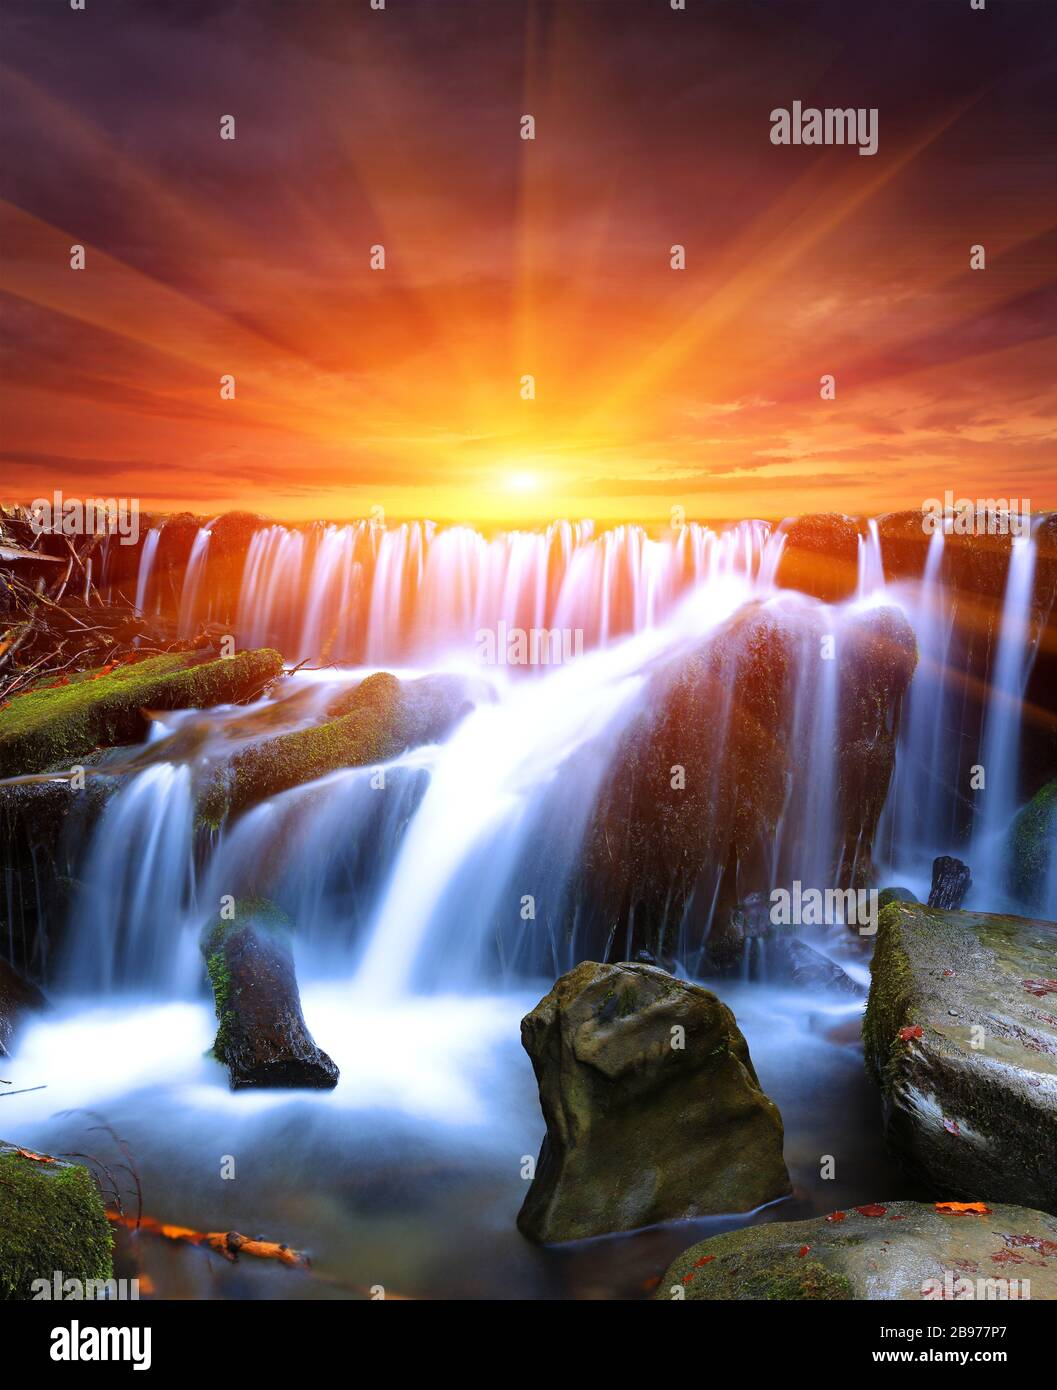

In [49]:
import PIL.Image
PIL.Image.open("image.jpg")

In [50]:
image = PIL.Image.open("image.jpg")
model_image.generate_content(image).text

' The photo is of a waterfall in a forest. The sun is setting and the sky is a bright orange. The waterfall is surrounded by rocks and moss-covered trees. The water is clear and looks refreshing. The photo is taken from a low angle, which makes the waterfall look even more majestic.'